In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load The Data

In [3]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EDA

In [4]:
# Drop the unwanted column from the data
data1 = data.drop("ID#" , axis=1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
#rename the 'Award?' column
data1 = data1.rename({'Award?':'Award'} , axis=1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Information about the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
# Standerdize the dataset
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(data1)
# scaled_data

## K-Means Clustering

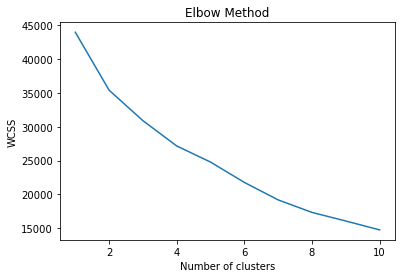

In [8]:
from sklearn.cluster import KMeans

# Determine Max. no. of clusters by Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=4)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

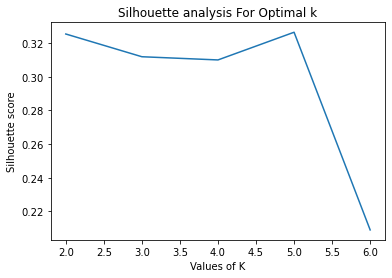

In [9]:
# Determine Max. no. of clusters by Silhouette Coefficient

from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 4, 5, 6]
silhouette = []

for c in n_clusters:
    
    # initialise kmeans
    kmeans = KMeans(n_clusters=c , init='k-means++' , random_state=4)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette.append(silhouette_score(scaled_data , cluster_labels))
     
plt.plot(n_clusters,silhouette)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [10]:
# KMeans Clustering Model
kmeans = KMeans(n_clusters=3, init='k-means++' , random_state=0)
label_km = kmeans.fit_predict(scaled_data)
label_km

array([0, 0, 0, ..., 1, 0, 0])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(2)
 
#Transform the data
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns = ['p1','p2'])
pca_df.head()

,p1,p2
0,-1.466674,-0.067183
1,-1.450564,-0.063743
2,-1.210051,-0.133555
3,-1.507201,-0.061529
4,3.006984,-0.185534


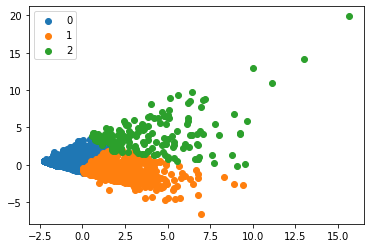

In [12]:
#Getting unique label_hcs
 
u_labels = np.unique(label_km)
 
#plotting the results:

for i in u_labels:
    plt.scatter(pca_data[label_km == i , 0] , pca_data[label_km == i , 1] , label = i)

plt.legend()
plt.show()

In [13]:
kmeans.inertia_

30899.246824652197

In [14]:
data['KM_labels'] = label_km
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [15]:
data['KM_labels'].value_counts()

0    2577
1    1258
2     164
Name: KM_labels, dtype: int64

In [16]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343,0.396599
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957,0.566930
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000,2.000000


In [17]:
data.groupby('KM_labels').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
KM_labels,,,,,,,,,,,,
0,2235.212262,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501
1,1601.309221,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623
2,1723.621951,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976


### Conclusion of K-Means Clustering

+ Cluster 0 have more person(i.e. more data points) but their chance of getting award is very less and there Flight and Bonus Transactions are minimal and they have less chance of getting Miles in any Transactions.

+ Cluster 1 have more person(i.e. more data points) but their chance of getting award is medium(near to mean value) and there Flight and Bonus Transactions are less and they have medium chance of getting Miles in any Transactions.

+ Cluster 2 have less person(i.e. less data points) but their chance of getting award is more and there Flight and Bonus Transactions are also high and they have more chance of getting Miles in any Transactions.

## Hierarchical Clustering

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

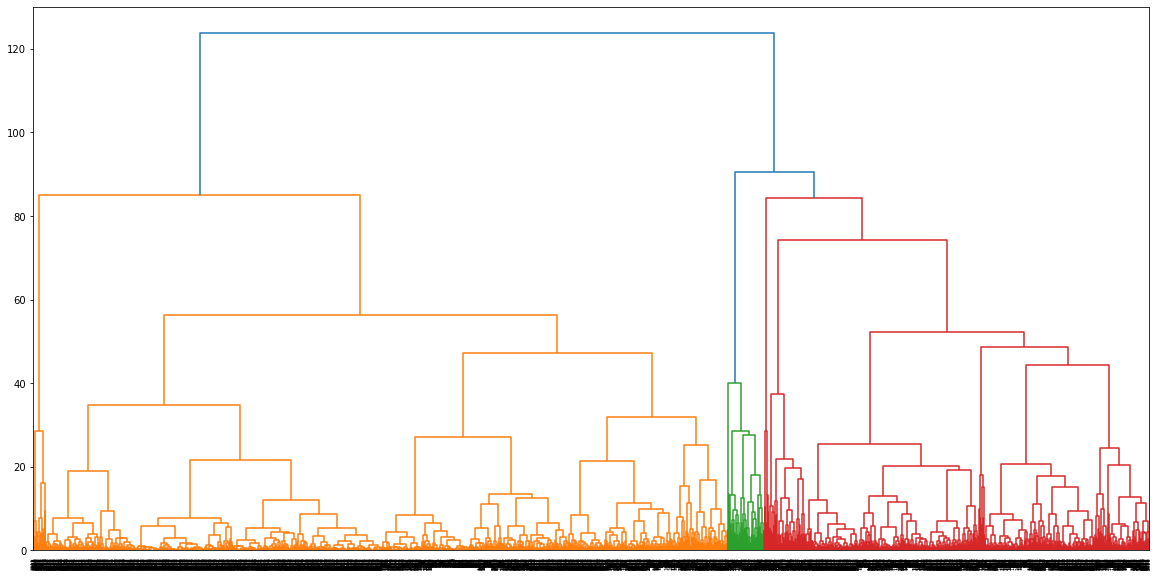

In [19]:
# Dendrogram
plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(scaled_data , method='ward') , color_threshold= 85)

In [20]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters = 3 , affinity = 'euclidean' , linkage = 'ward')

In [21]:
label_hc = hc.fit_predict(scaled_data)
label_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

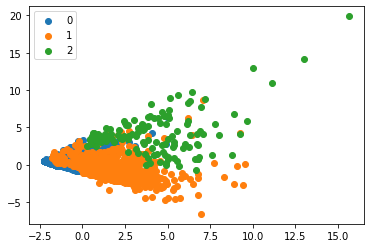

In [22]:
#Getting unique label_hcs
 
u_labels = np.unique(label_hc)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_data[label_hc == i , 0] , pca_data[label_hc == i , 1] , label = i)
plt.legend()
plt.show()

In [23]:
data['HC_labels'] = label_hc
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels,HC_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


In [24]:
data['HC_labels'].value_counts()

0    2489
1    1380
2     130
Name: HC_labels, dtype: int64

In [25]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels,HC_labels
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343,0.396599,0.410103
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957,0.566930,0.554086
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,0.000000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,0.000000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,1.000000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000,2.000000,2.000000


In [26]:
data.groupby('HC_labels').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
HC_labels,,,,,,,,,,,,,
0,2198.450783,46718.863399,9.274407,1.242266,1.023303,1.000000,5037.792688,7.091201,221.167135,0.700281,3772.785858,0.188027,0.039373
1,1707.093478,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043,0.902899
2,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,1.861538


In [27]:
silhouette_score(pca_df, label_hc)

0.4768601679284374

### Conclusion of Hierarchical Clustering

+ Cluster 0 have more person(i.e. more data points) but their chance of getting award is very less and there Flight and Bonus Transactions are minimal and they have less chance of getting Miles in any Transactions.

+ Cluster 1 have more person(i.e. more data points) but their chance of getting award is medium(near to mean value) and there Flight and Bonus Transactions are less and they have medium chance of getting Miles in any Transactions.

+ Cluster 2 have less person(i.e. less data points) but their chance of getting award is more and there Flight and Bonus Transactions are also high and they have more chance of getting Miles in any Transactions.

## DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
data1.shape

(3999, 11)

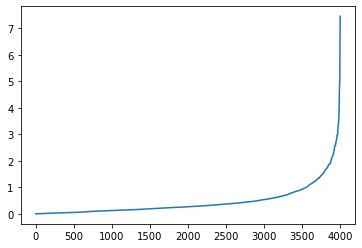

In [30]:
from sklearn.neighbors import NearestNeighbors

#Calculate the average distance between each point in the ata set and its 8 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=22)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)


distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [31]:
#Model Building 
# Taking min_sample as 22(i.e. 2d) and eps as 1.5 from above graph
dbscan = DBSCAN(eps = 2.5 , min_samples = 22)
dbscan.fit(scaled_data)
label_db = dbscan.labels_
label_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

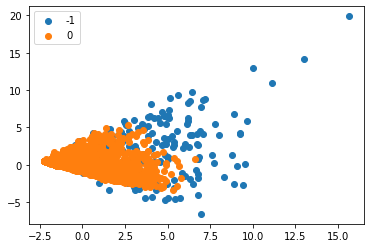

In [32]:
#Getting unique label_hcs
 
u_labels = np.unique(label_db)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_data[label_db == i , 0] , pca_data[label_db == i , 1] , label = i)
plt.legend()
plt.show()

In [33]:
data['DB_labels'] = label_db
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels,HC_labels,DB_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0


In [34]:
data['DB_labels'].value_counts()

 0    3789
-1     210
Name: DB_labels, dtype: int64

In [35]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels,HC_labels,DB_labels
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343,0.396599,0.410103,-0.052513
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957,0.566930,0.554086,0.223087
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,-1.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,0.000000,0.000000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,1.000000,1.000000,0.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000,2.000000,2.000000,0.000000


In [36]:
data.groupby('DB_labels').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_labels,HC_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DB_labels,,,,,,,,,,,,,,
-1,1724.109524,210436.438095,1554.490476,2.504762,1.27619,1.233333,44976.833333,24.604762,3256.414286,9.480952,4740.204762,0.680952,1.209524,1.147619
0,2030.931644,66017.433888,65.946424,2.034838,1.00000,1.000000,15602.297440,10.881235,305.071523,0.924254,4084.105569,0.353127,0.351544,0.369227


In [37]:
silhouette_score(pca_df, label_db)

0.5839925511927779

### Conclusion of DBSCAN

+ Cluster -1 have more person(i.e. more data points) but their chance of getting award is medium(near to mean value) and there Flight and Bonus Transactions are less and they have medium chance of getting Miles in any Transactions.

+ Cluster 0 have less person(i.e. less data points) and their chance of getting award is very less and there Flight and Bonus Transactions are minimal and they have less chance of getting Miles in any Transactions.